In [9]:
#experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('processed_data.csv',index_col = [0])
data.index = pd.to_datetime(data.index)


In [149]:
data_10min.resample('1d',label = 'left').mean()

,26,59,77,86,93,101,114,115,171,187,...,9926,9932,9935,9937,9938,9939,9942,9971,9982,9983
localminute,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.423847,3.740420,2.172060,1.318624,0.770031,0.344983,1.344415,0.828958,0.611078,0.922910,...,1.094605,0.688378,10.524246,0.607397,3.097021,1.675106,1.000178,2.707157,0.803247,1.567674
2016-01-02 00:00:00+00:00,0.413940,3.823515,1.604062,1.688817,0.779303,0.774533,1.065692,0.697233,0.653487,0.889226,...,0.954474,0.513903,12.509972,1.237385,3.729062,1.665482,1.165010,1.827063,1.145897,0.986990
2016-01-03 00:00:00+00:00,0.453401,3.115102,1.842302,1.331677,1.042420,0.437622,1.213119,0.541097,0.756447,0.882767,...,0.890515,0.706456,8.369547,1.288713,3.071493,1.344662,1.161492,0.416499,0.409410,1.264992
2016-01-04 00:00:00+00:00,0.489715,2.737643,1.495615,1.114213,0.699389,0.668272,0.842311,0.674394,0.597208,0.888017,...,0.633818,0.626919,12.497775,0.673017,2.617347,1.170331,1.042488,0.295152,0.475943,1.555961
2016-01-05 00:00:00+00:00,0.419303,2.743159,1.778170,1.148585,0.619221,0.261000,1.337841,0.721298,0.559208,0.887169,...,0.548084,0.542321,12.181866,0.796205,2.429939,1.193866,0.804526,1.402610,0.740463,1.431423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-26 00:00:00+00:00,1.118054,0.596225,1.344026,1.940632,0.917703,0.782973,0.947819,0.612135,0.764073,2.018410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-27 00:00:00+00:00,1.078142,0.625122,1.602167,1.384201,0.948833,0.638742,0.956657,0.554603,0.747902,2.055349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-28 00:00:00+00:00,1.165285,0.611022,1.433111,1.921997,1.153428,0.799763,0.927221,0.363283,0.964803,1.831410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# clustering by daily load pattern
# compute average daily pattern
daily_pattern = pd.DataFrame(columns = data.columns)
for i in data.columns:
    daily_pattern[i] = np.nanmean(np.array(data[i][:(data.shape[0] - data.shape[0]%(60*24))]).reshape(-1,24*60),axis = 0)

In [12]:
daily_pattern = daily_pattern.loc[:,daily_pattern.columns[daily_pattern.std(0)!=0]]

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# plot elbow plot
def elbow_plot(X,n_clusters = np.arange(1,40,2)):
    distortions = []
    for n in n_clusters:
        kmmodel = KMeans(n)
        kmmodel.fit(X.T)
        distortions.append(sum(np.min(cdist(X.T, kmmodel.cluster_centers_, 'euclidean'), axis=1)) / X.T.shape[0])
    plt.plot(n_clusters, distortions, 'bx-')
    plt.xticks(n_clusters)
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')

In [27]:
import pickle
def labeled_plot(X,k=31,xnum=4,ynum=8,silent = True):
    '''
    k should <= xnum*ynum
    '''
    X = X.reset_index(drop = True)
    kmmodel = KMeans(k)
    kmmodel.fit(X.T)
    clusters_dict = {label:0 for label in set(kmmodel.labels_)}
    for i in kmmodel.labels_:
        clusters_dict[i] += 1
    count = pd.DataFrame(clusters_dict,index = ['count']).T.sort_values(by = 'count',ascending = False)
    clusters_dict = {label:0 for label in count.index}
    for label in count.index:
        clusters_dict[label] = X.iloc[:,kmmodel.labels_ == label]
    if not silent:
        fig = plt.figure(figsize=(20,8))
        for k,label in enumerate(count.index):
            fig.add_subplot(xnum,ynum,k+1).plot(clusters_dict[label],alpha = 0.03)
#             plt.subplot(xnum,ynum,k+1).plot(clusters_dict[label].mean(1),'r')
            plt.plot(clusters_dict[label].mean(1),'r')
    return clusters_dict

def save_dict(cluster_dicts, file_name):
    with open(file_name,'wb+') as f:
        pickle.dump(clusters_dict,f)
        
def normalized(load):
    peak = load.max(axis=1)[:, None]
    trough = load.min(axis=1)[:, None]
    diff = peak - trough
    diff[diff == 0.] = 1.
    normalized = (load - trough) / diff
    return normalized

def resample_normalization(data,granularity = '1min'):
    data.index = pd.date_range('2016-01-01-00:00:00','2016-01-01-23:59:59',freq = 'min')
    data = data.resample(granularity,label = 'left').mean()
    data = normalized(data)
    return data

<ipython-input-22-a7638fc303dc>:29: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  peak = load.max(axis=1)[:, None]
<ipython-input-22-a7638fc303dc>:30: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  trough = load.min(axis=1)[:, None]


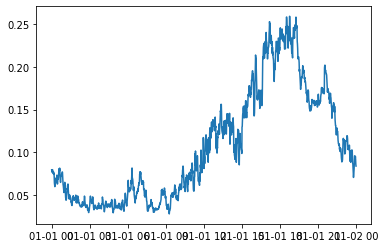

In [24]:
plt.plot(resample_normalization(daily_pattern,'1min').iloc[:,0])

<ipython-input-17-a7638fc303dc>:29: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  peak = load.max(axis=1)[:, None]
<ipython-input-17-a7638fc303dc>:30: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  trough = load.min(axis=1)[:, None]


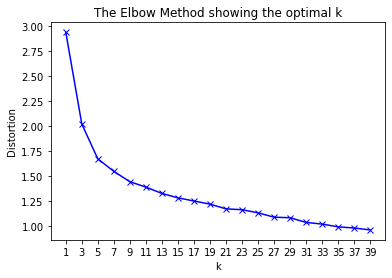

In [18]:


elbow_plot(resample_normalization(daily_pattern,'1min'),n_clusters = np.arange(1,40,2))

In [26]:
# granularity 1min 31 clusters
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'1min'), 5, 2, 3, silent=False)

<ipython-input-25-88ede72b4f5b>:29: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  peak = load.max(axis=0)[:, None]
<ipython-input-25-88ede72b4f5b>:30: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  trough = load.min(axis=0)[:, None]


ValueError: Unable to coerce to DataFrame, shape must be (1440, 342): given (342, 1)

<ipython-input-17-a7638fc303dc>:29: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  peak = load.max(axis=1)[:, None]
<ipython-input-17-a7638fc303dc>:30: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  trough = load.min(axis=1)[:, None]


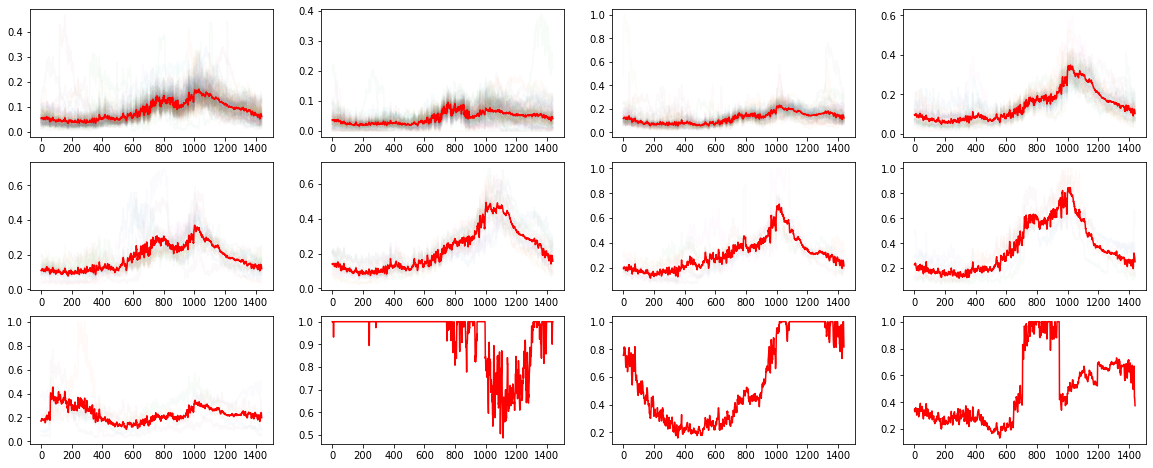

In [20]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'1min'),12,3,4,silent = False)

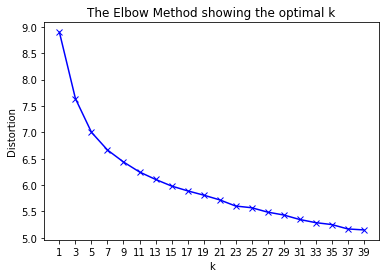

In [122]:
elbow_plot(resample_normalization(daily_pattern,'10min'),n_clusters = np.arange(1,40,2))

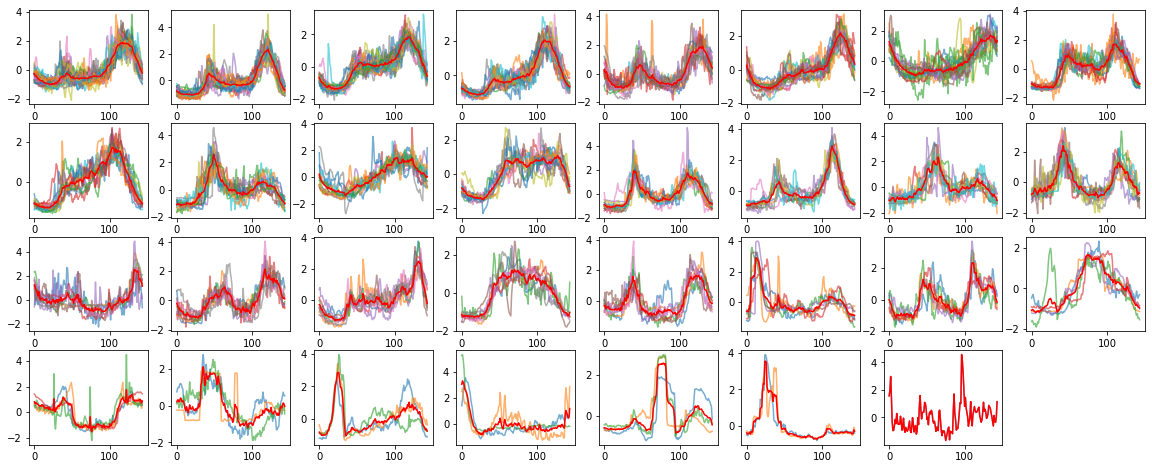

In [124]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'10min'),31,4,8,silent = False)

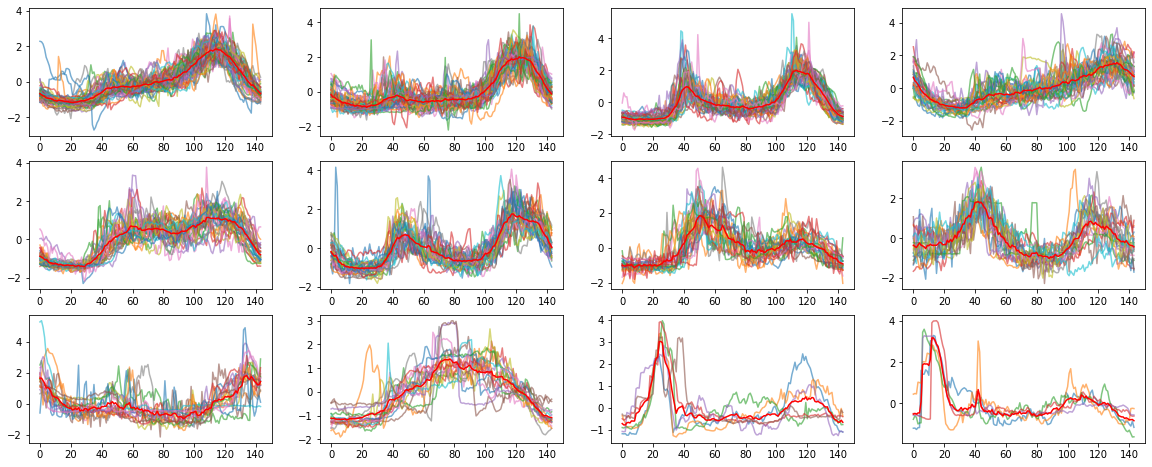

In [123]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'10min'),12,3,4,silent = False)

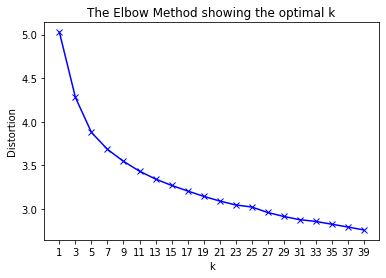

In [127]:
elbow_plot(resample_normalization(daily_pattern,'30min'),n_clusters = np.arange(1,40,2))

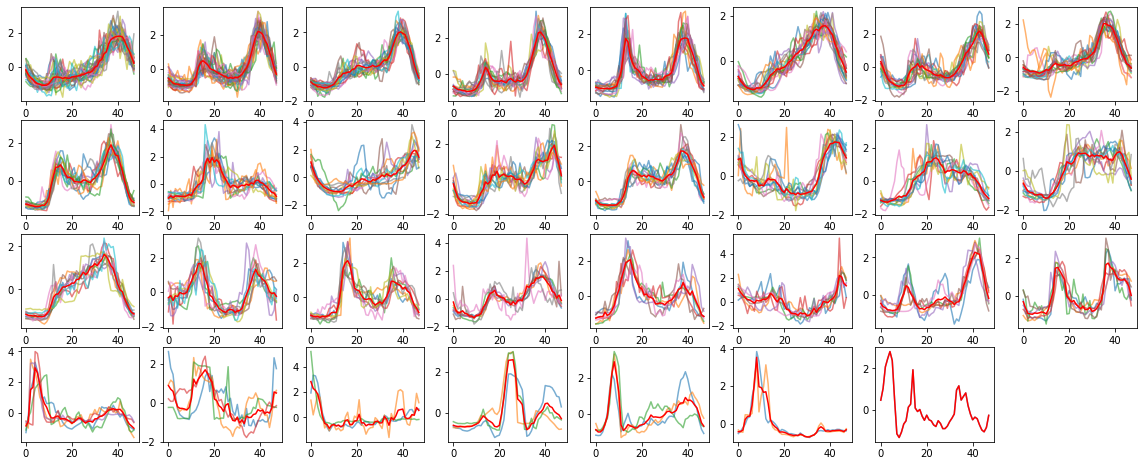

In [125]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'30min'),31,4,8,silent = False)

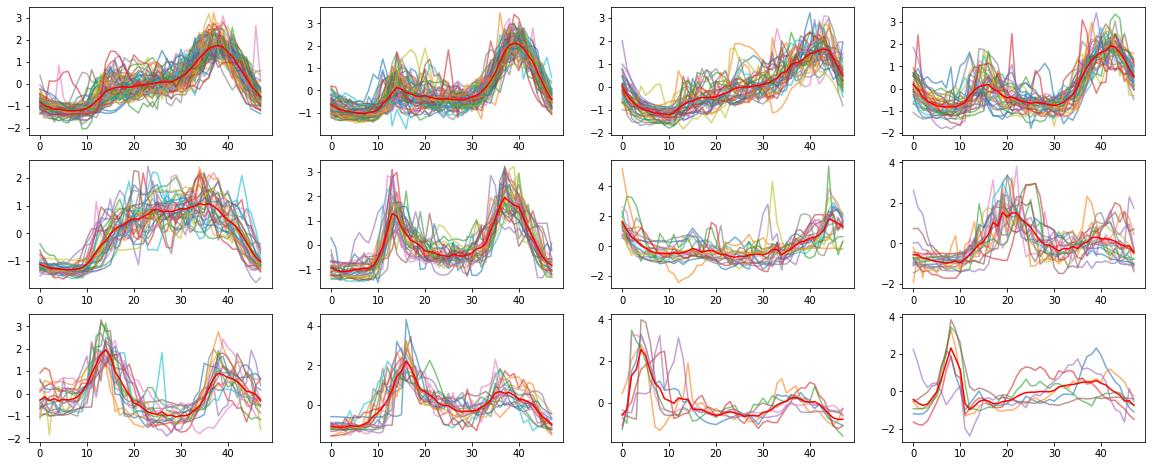

In [128]:
clusters_dict = labeled_plot(resample_normalization(daily_pattern,'30min'),12,3,4,silent = False)

In [54]:
import pickle
with open('kmeans_granuity_1min.pkg','wb+') as f:
    pickle.dump(clusters_dict,f)